# Lab 01 Problema - Propensión de churn

En este problema vamos a construir un modelo de propensión de churn para una compañía del sector de las telecomunicaciones. El conjunto de datos se puede descargar desde este [enlace](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) en la página web de Kaggle.

Las empresas de telecomunicaciones, las aseguradoras y los bancos suelen considerar la fuga o ratio de fuga de clientes como uno de sus principales indicadores/KPIs comerciales, ya que el coste de retener a un cliente es mucho menor que el de adquirir uno nuevo. No es extraño, por tanto, que las empresas de estos sectores tengan departamentos dedicadas únicamente a maximizar la retención de clientes, porque los clientes recuperados a largo plazo pueden valer mucho más para una empresa que los clientes recién contratados.

Una distinción importante a realizar es entre el churn voluntario y el churn involuntario. La baja voluntaria se produce debido a la decisión del cliente de cambiar a otra empresa o proveedor de servicios, mientras que la baja involuntaria se produce debido a circunstancias como el fallecimiento o la reubicación del cliente en un centro de otro lugar. A las empresas les interesa, sobre todo, el churn voluntario, porque normalmente es consecuencia de la relación con el cliente, en la cual pueden intervenir (por ejemplo, interacciones para temas de facturación o método de ayuda post-venta).

Mediante analítica predictiva y técnicas de Machine Learning, es posible construir modelos de propensión al churn, capaces de obtener la probabilidad de fuga de cada cliente. Dado que con estos modelos es posible generar una lista priorizada de potenciales abandonistas, son eficaces para ayudar a los programas de marketing y retención en poner foco en el subconjunto de clientes más propensos a la fuga. 

1. [Exploración de los datos](#seccion1)     
2. [Análisis estadístico inicial](#seccion2)
3. [Limpieza de datos](#seccion3)
4. [Feature engineering](#seccion4) 
5. [Categorical encoding](#seccion5) 
6. [Entrenamiento del modelo](#seccion6)     
7. [Validación del modelo](#seccion7)  

<a id='seccion1'></a>
## 1. Exploración de los datos 

In [1]:
import pandas as pd

# Cargamos datos de entrenamiento 
df = pd.read_csv("data/churn_data.csv")

In [2]:
# Visualizamos las 5 primeras filas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Veamos las dimensiones del dataframe
df.shape 

(7043, 21)

In [4]:
df['customerID'].nunique() == len(df) # El campo customerID es la clave primaria del dataframe. 

True

Tenemos disponible un diccionario con la definición de cada variable:

|variable|explicación|
|---|---|
|*customerID*|Customer ID  
|*gender*|Whether the customer is a male or a female   
|*SeniorCitizen*|Whether the customer is a senior citizen or not (1, 0)  
|*Partner*|Whether the customer has a partner or not (Yes, No)  
|*Dependents*|Whether the customer has dependents or not (Yes, No)  
|*tenure*|Number of months the customer has stayed with the company  
|*PhoneService*|Whether the customer has a phone service or not (Yes, No)  
|*MultipleLines*|Whether the customer has multiple lines or not (Yes, No, No phone service)  
|*InternetService*|Customer’s internet service provider (DSL, Fiber optic, No)  
|*OnlineSecurity*|Whether the customer has online security or not (Yes, No, No internet service)  
|*OnlineBackup*|Whether the customer has online backup or not (Yes, No, No internet service)  
|*DeviceProtection*|Whether the customer has device protection or not (Yes, No, No internet service)  
|*TechSupport*|Whether the customer has tech support or not (Yes, No, No internet service)  
|*StreamingTV*|Whether the customer has streaming TV or not (Yes, No, No internet service)  
|*StreamingMovies*|Whether the customer has streaming movies or not (Yes, No, No internet service)  
|*Contract*|The contract term of the customer (Month-to-month, One year, Two year)  
|*PaperlessBilling*|Whether the customer has paperless billing or not (Yes, No)  
|*PaymentMethod*|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
|*MonthlyCharges*|The amount charged to the customer monthly  
|*TotalCharges*|The total amount charged to the customer  
|*Churn*|Whether the customer churned or not (Yes or No)  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
## Reemplazo de espacios por valores nulos en el campo TotalCharges
df['TotalCharges'] = df["TotalCharges"].replace(" ", np.nan).astype('float64')

df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [7]:
target_col = 'Churn' # Nos la guardamos en la variable de Python target_col
df[target_col].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [8]:
# Nos convertimos la variable en numérica
df[target_col] = (df[target_col] == "Yes").astype(int)
df[target_col].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [9]:
df[target_col].value_counts() # Distribución de la variable

0    5174
1    1869
Name: Churn, dtype: int64

In [10]:
df[target_col].value_counts(normalize = True) # Distribución de la variable en porcentaje

0    0.73463
1    0.26537
Name: Churn, dtype: float64

<AxesSubplot:>

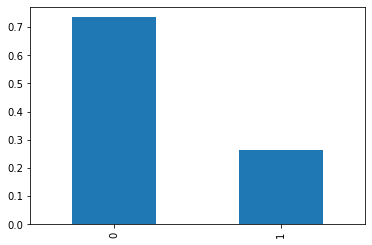

In [11]:
df[target_col].value_counts(normalize = True).plot(kind = 'bar') # Gráfico de barras 

In [12]:
id_cols = ['customerID']
print("ID variables: ", id_cols)

ID variables:  ['customerID']


In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist() 
# Variables numéricas excluyendo target_col 
numeric_cols = [c for c in numeric_cols if c != target_col] # List comprehension
print("Numerical variables: ", numeric_cols)

Numerical variables:  ['tenure', 'MonthlyCharges', 'TotalCharges']


In [14]:
categoric_cols = df.select_dtypes(include=['object']).columns.tolist()
# Variables categóricas excluyendo id_cols 
categoric_cols = [c for c in categoric_cols if c not in id_cols] # List comprehension
print("Categorial variables: ", categoric_cols)

Categorial variables:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


<a id='seccion2'></a>
## 2. Análisis estadístico inicial

### 2.1 Univariante

#### 2.1.1 Variables numéricas

En primer lugar, veamos un resumen estadístico de las variables numéricas.

In [15]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.265370
std,24.559481,30.090047,2266.771362,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


Para mayor profundidad, podemos visualizar la distribución de las variables numéricas mediante **histogramas** y **boxplots**.

In [16]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5] # Se define tamaño de gráfico por cuestiones estéticas

In [17]:
def plot_histogram_and_boxplot(df, column_name):
    """Plots the histogram and boxplot of a numerical variable. 

    Parameters:
    column_name (str): Numeric variable's name

    Returns:
    None
    """
    # Remove nulls in variable 
    df_ = df.loc[df[column_name].notnull()]
    
    fig = plt.figure()
    fig.suptitle(column_name, fontsize=16)
    fig.subplots_adjust(wspace = 0.3)
    
    ax1 = fig.add_subplot(121)
    ax1.set_title("histogram")
    ax1.hist(df_[column_name], bins = 25)
    
    ax2 = fig.add_subplot(122)
    ax2.set_title("boxplot")
    ax2.boxplot(df_[column_name], vert = False)

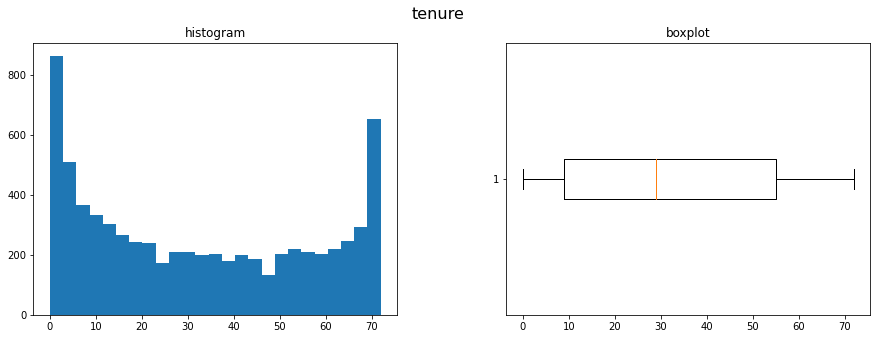

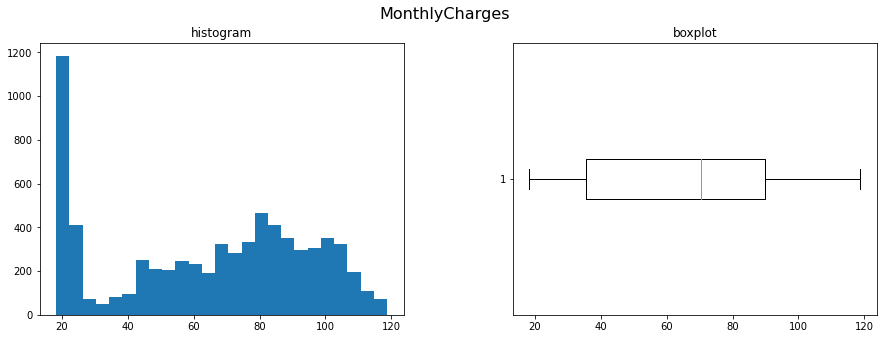

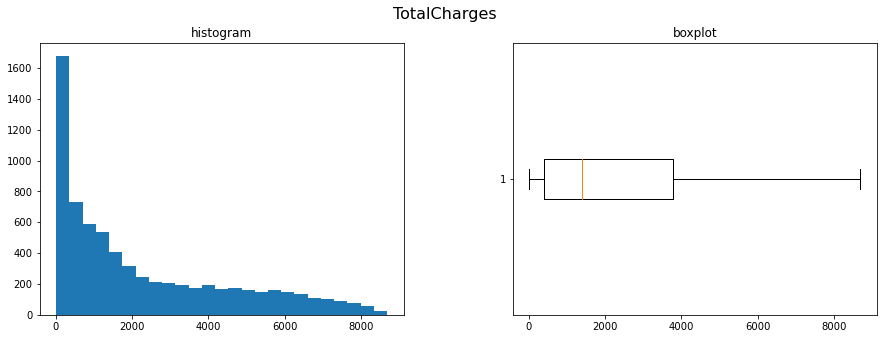

In [18]:
for c in numeric_cols:
    plot_histogram_and_boxplot(df = df, column_name = c)

#### 2.1.2 Variables categóricas

A continuación veamos la distribución de las variables categóricas mediante **gráficos de barra**.

In [19]:
def plot_barplot(df, column_name):
    """Plots the barplot of a categorical variable. 

    Parameters:
    column_name (str): Categorical variable's name

    Returns:
    None
    """ 
    fig = plt.figure()
    fig.suptitle(column_name, fontsize=16)
    df[column_name].value_counts().plot(kind = 'bar')

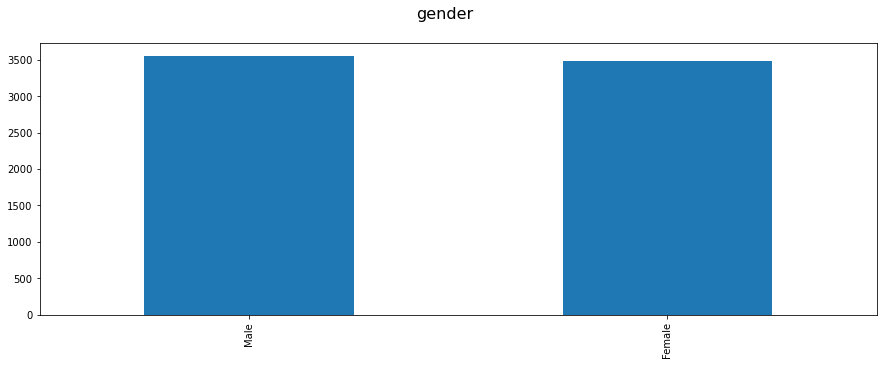

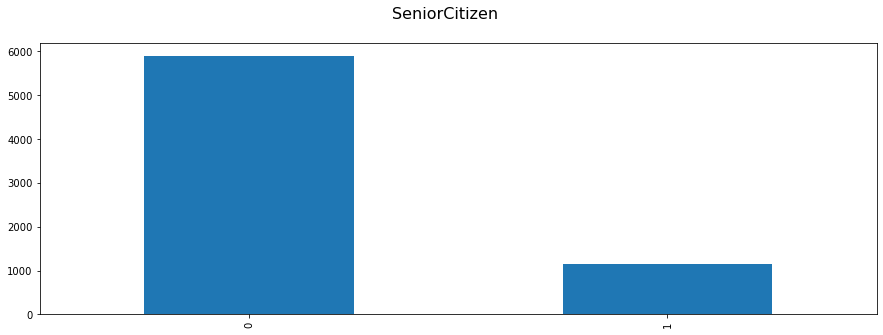

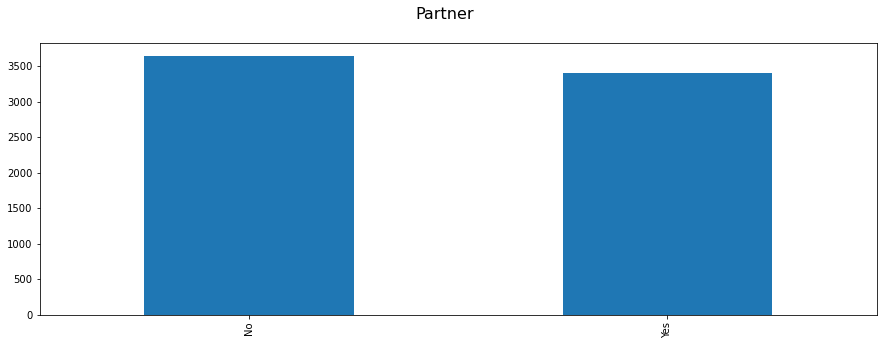

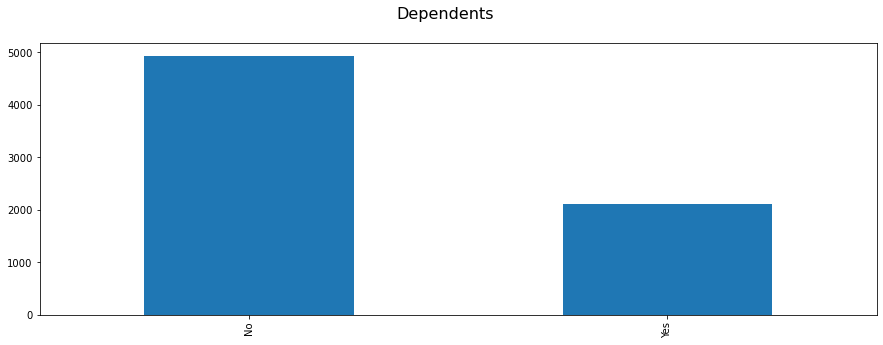

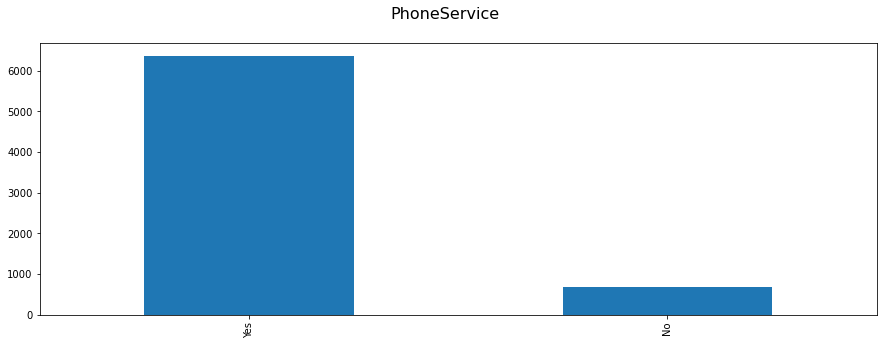

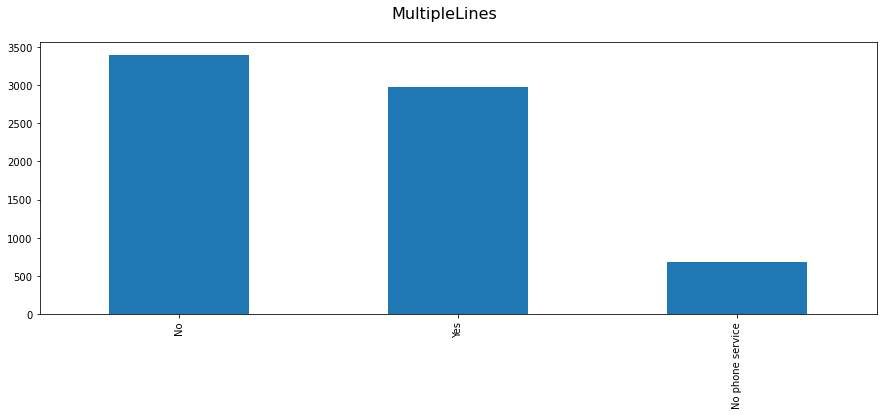

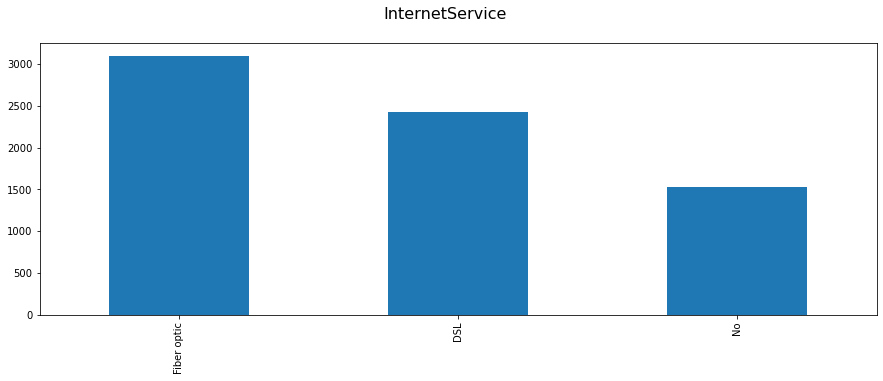

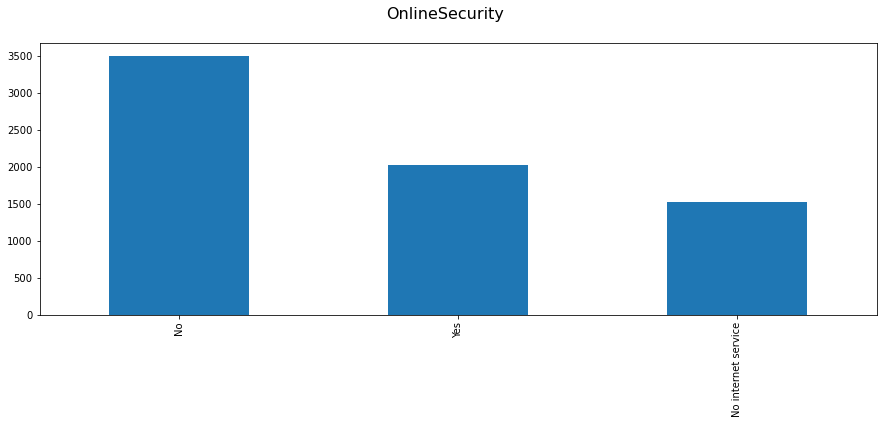

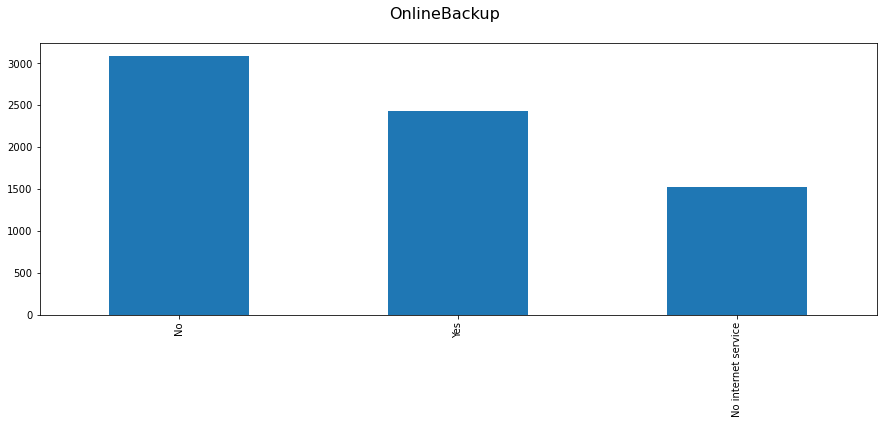

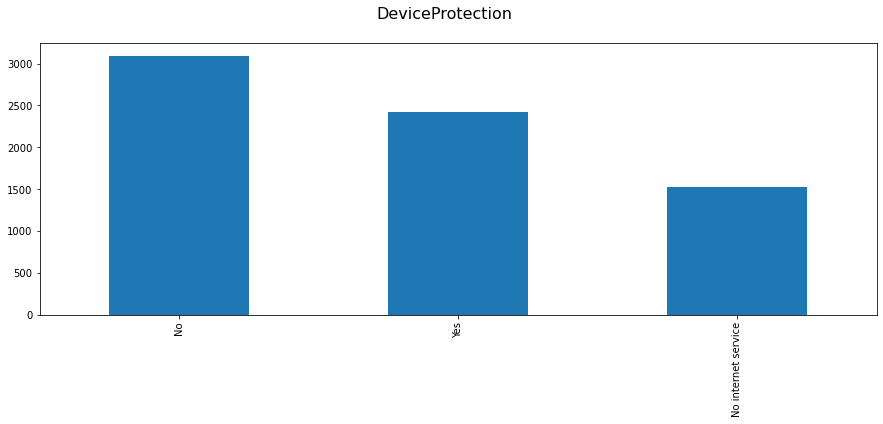

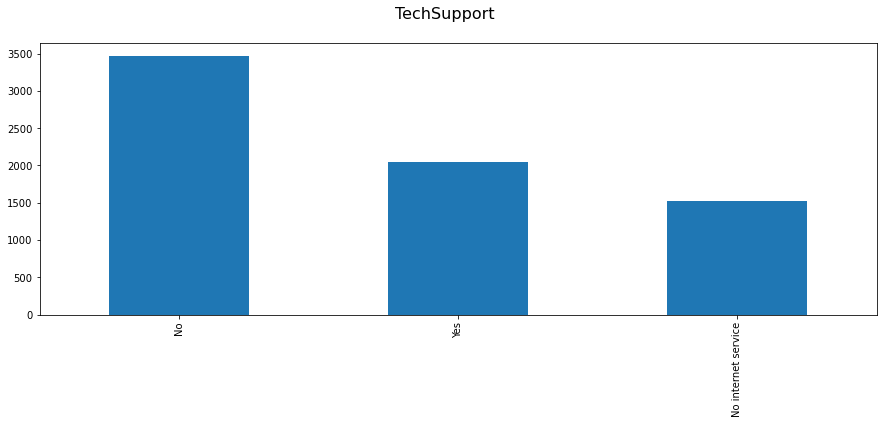

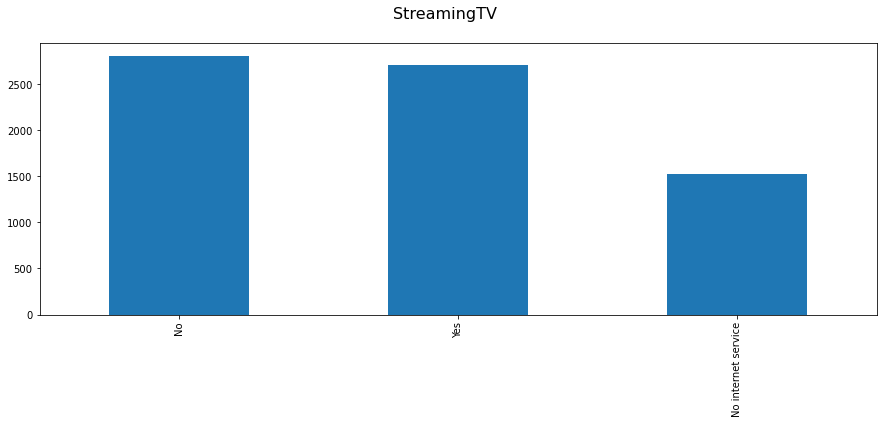

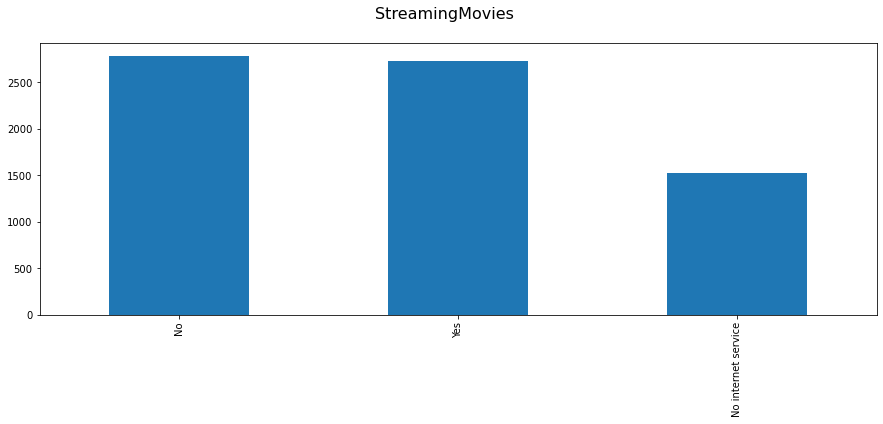

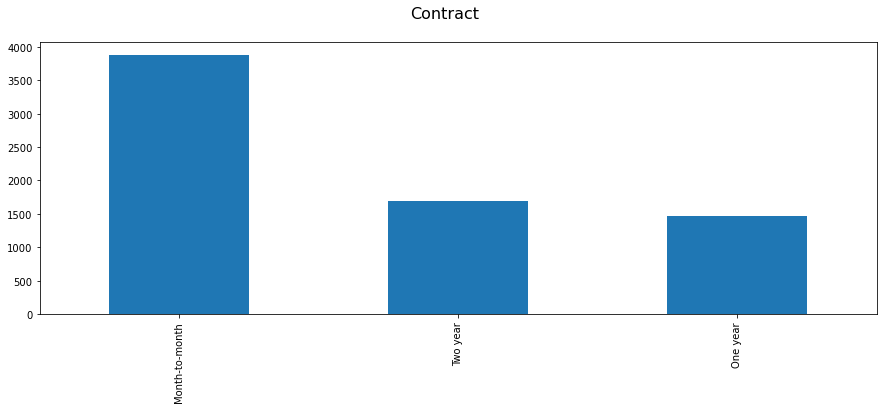

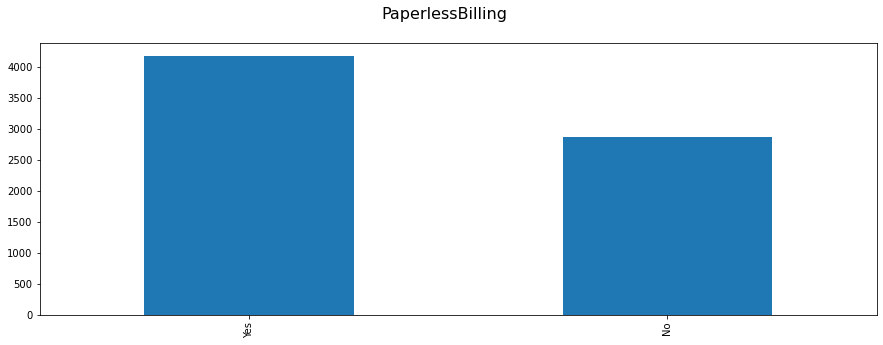

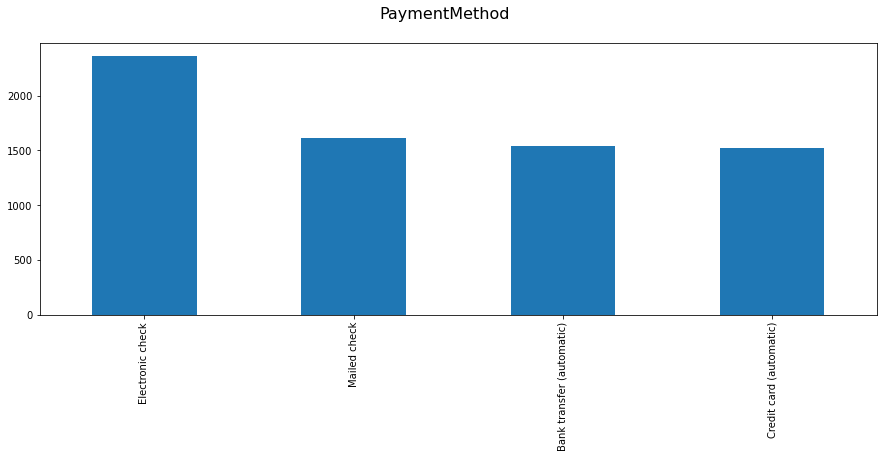

In [20]:
for c in categoric_cols:
    plot_barplot(df = df, column_name = c)

### 2.2 Bivariante

Además de conocer la distribución de las variables explicativas, es importante analizar si esta cambia en función de la variable objetivo y existe, por tanto, cierta relación de dependencia. 

#### 2.2.1 Variables numéricas

In [21]:
import seaborn as sns

def plot_histogram_by_target(df, input_name, target_name):
    """Plots the histogram and boxplot of a numerical variable by target

    Parameters:
    input_name (str): Numeric variable's name
    target_name (str): Target variable's name

    Returns:
    None
    """
    fig = plt.figure()
    fig.suptitle(input_name, fontsize=16)
    ax1 = fig.add_subplot(121)
    sns.histplot(data=df, x=input_name, hue=target_name, alpha=.5, bins=25, ax=ax1)
    
    ax2 = fig.add_subplot(122)
    sns.boxplot(data=df, x=target_name, y=input_name, ax=ax2)

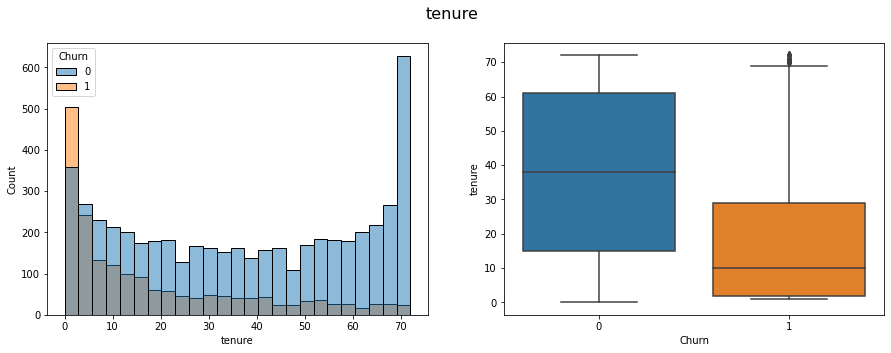

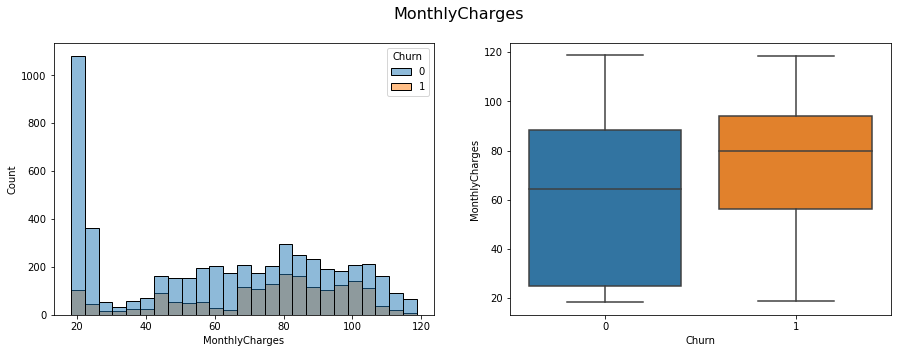

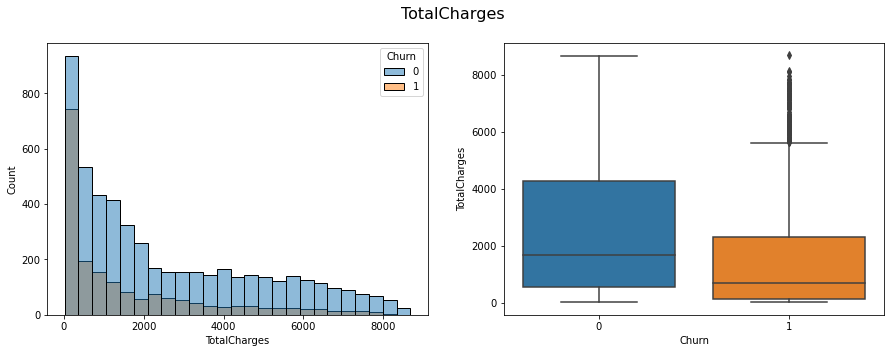

In [22]:
for c in numeric_cols:
    plot_histogram_by_target(df = df, input_name = c, target_name = target_col)

#### 2.2.2 Variables categóricas

In [23]:
def plot_barplot_by_target(df, input_name, target_name, stacked = False):
    """Plots the barplot of a categorical variable by target. 

    Parameters:
    input_name (str): Categorical variable's name
    target_name (str): Target variable's name

    Returns:
    None
    """ 
    fig = plt.figure()
    sns.countplot(data=df, x=input_name, hue=target_name)

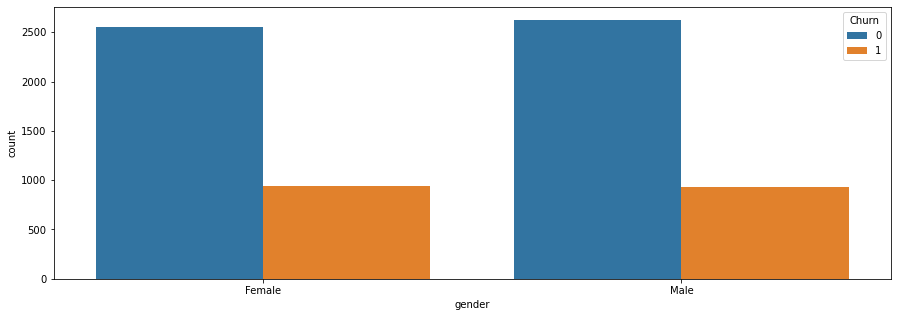

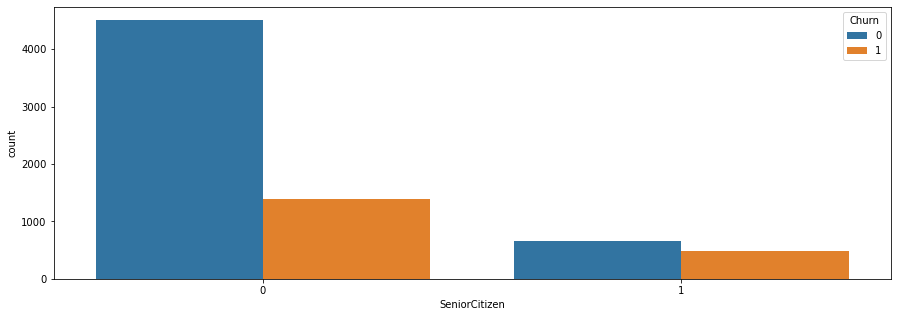

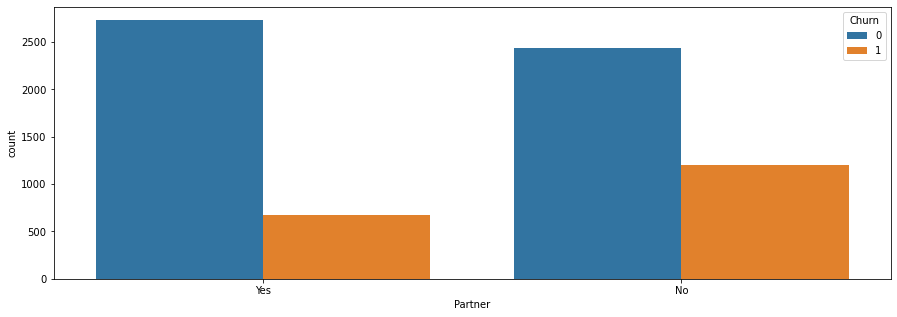

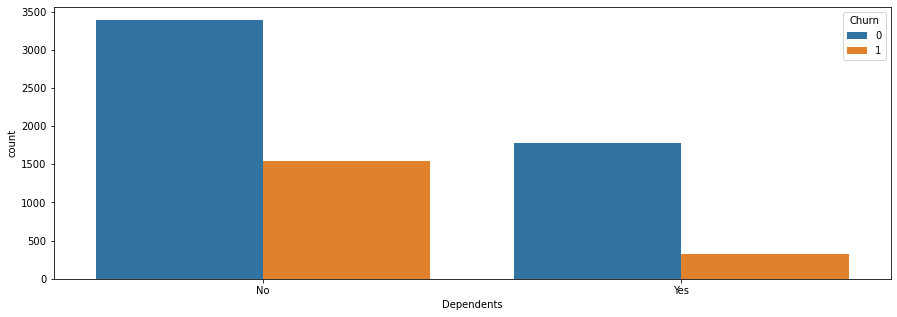

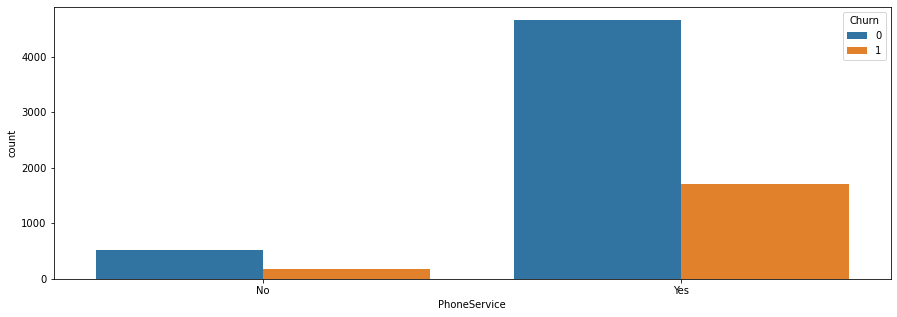

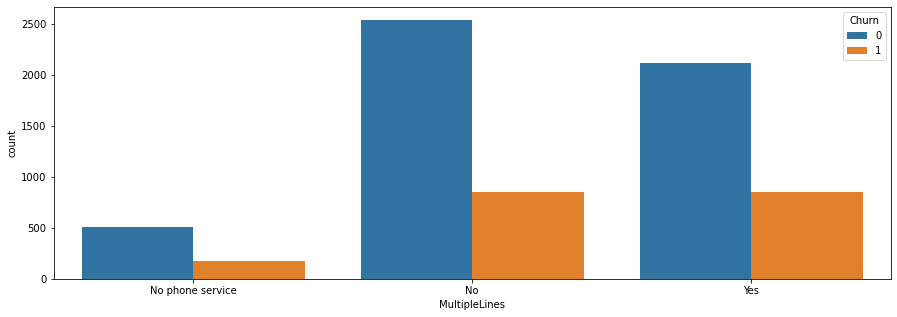

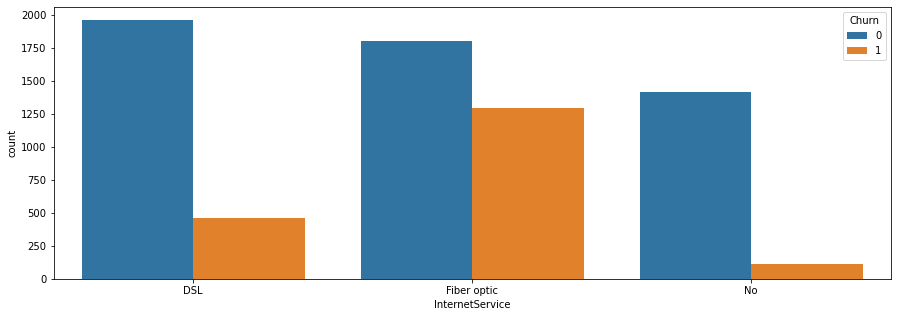

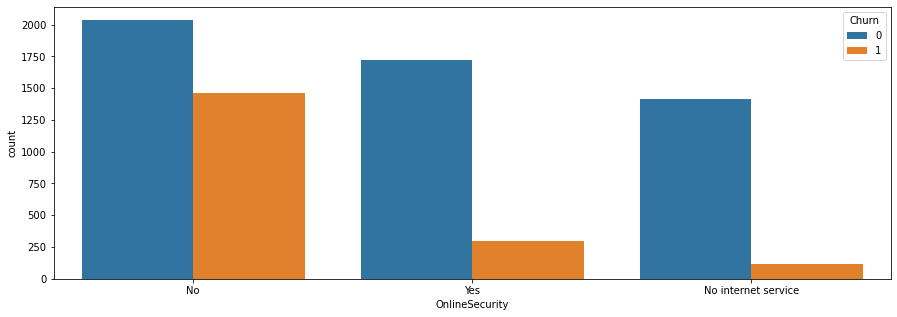

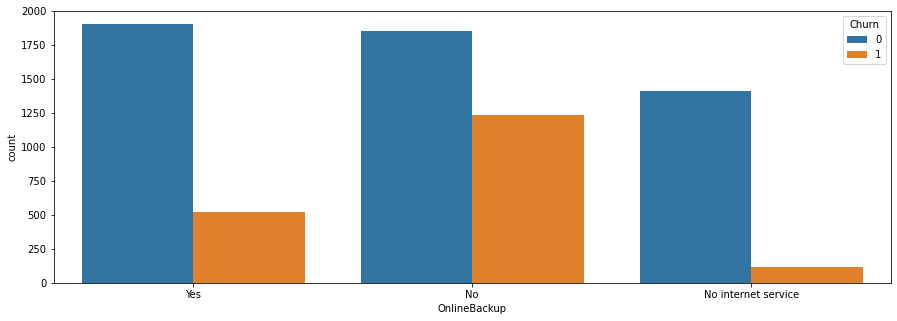

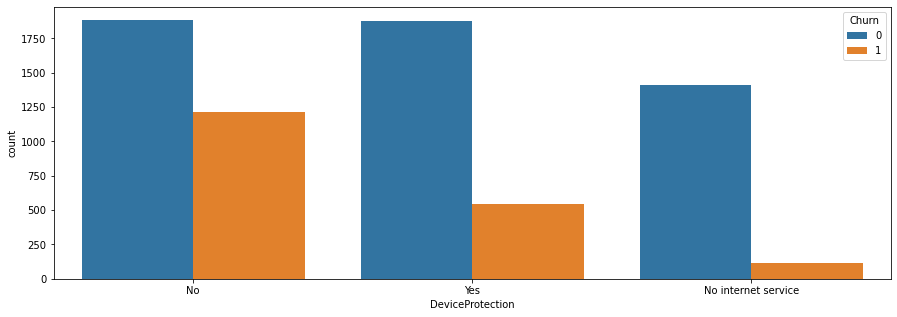

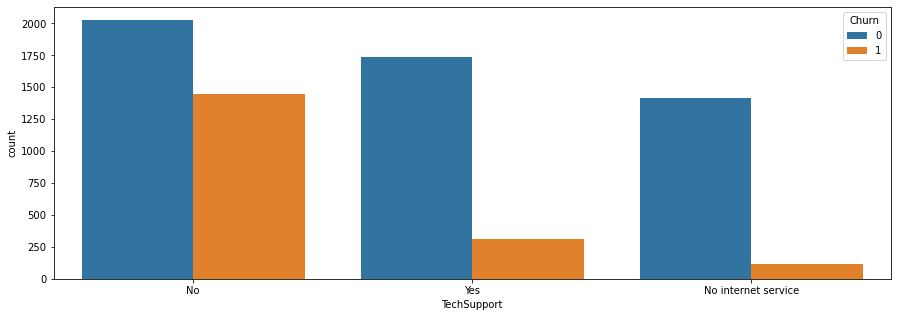

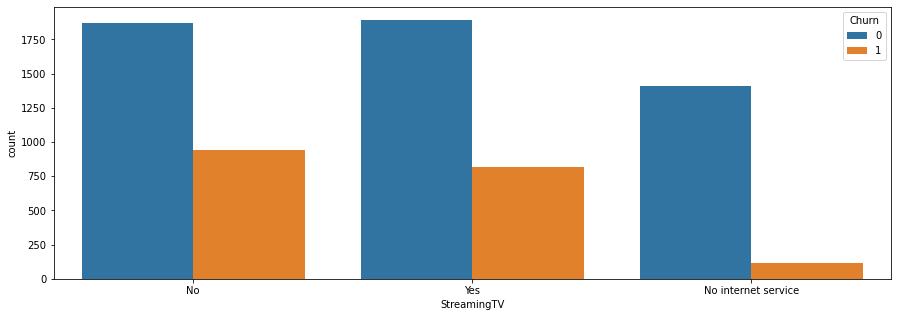

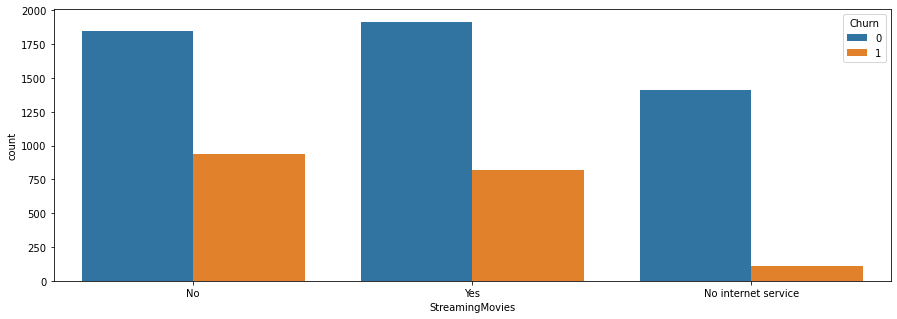

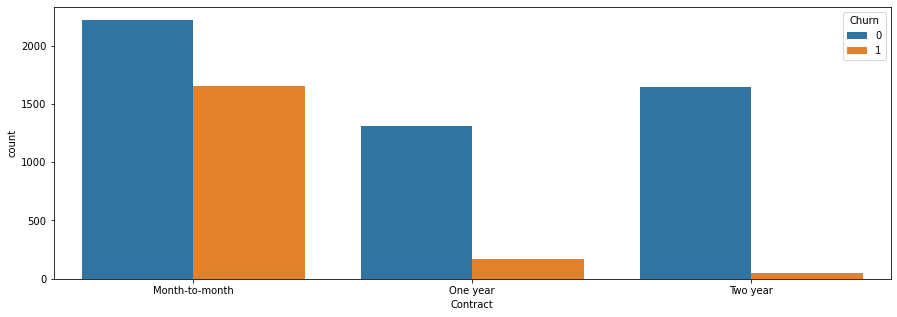

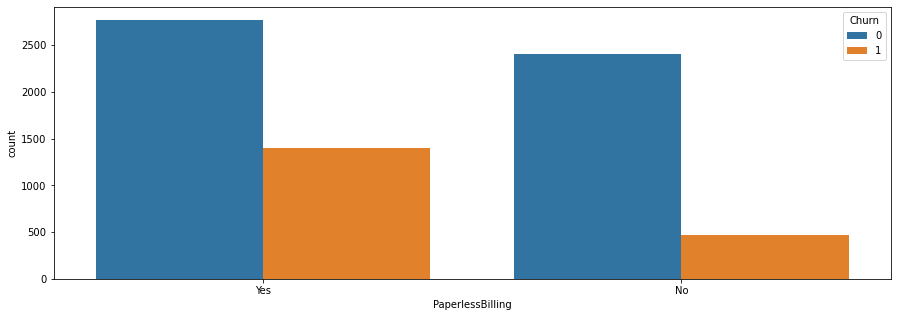

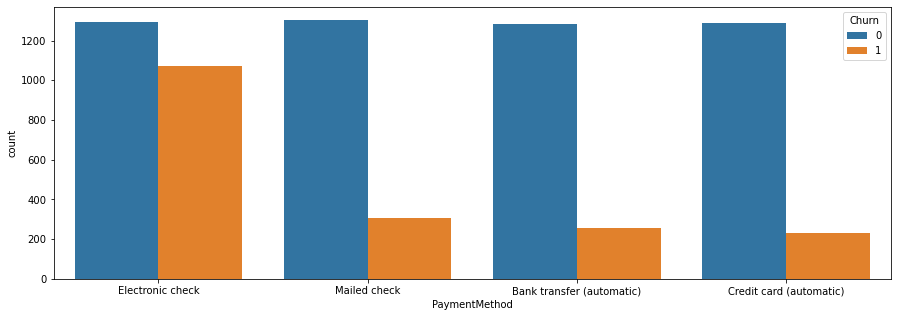

In [24]:
for c in categoric_cols:
    plot_barplot_by_target(df = df, input_name = c, target_name = target_col)

<a id='seccion3'></a>
## 3. Limpieza de datos

### 3.1 Eliminación de duplicados

In [25]:
len(df.drop_duplicates()) / len(df) # No hay filas duplicadas 

1.0

### 3.2 Imputación de valores ausentes 

Veamos qué variables tienen valores ausentes (**missings**) y, en caso afirmativo, cuántos tienen:

In [26]:
nulls_per_variable = df.isnull().sum() # Utilizamos el método de pandas isna() o isnull()
nulls_per_variable

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Variables numéricas con nulos: *TotalCharges*

In [27]:
df[['TotalCharges']].min() # Valor mínimo de TotalCharges
# Confirmamos que la TotalCharges siempre toma valores positivos, 
# por lo podemos imputar los nulos por un valor fuera de rango: -1, por ejemplo 

TotalCharges    18.8
dtype: float64

In [28]:
df['TotalCharges'].fillna(-1, inplace = True)
df[['TotalCharges']].min()

TotalCharges   -1.0
dtype: float64

Comprobamos que la imputación se ha hecho bien en las tres variables

In [29]:
nulls_per_variable = df.isna().sum() 
nulls_per_variable

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<a id='seccion4'></a>
## 4. Feature engineering

Vamos a crear 3 variables adicionales:

- Número de productos por usuario
- Antigüedad en años
- Diferencia porcentual entre el gasto mensual actual y mensual estimado histórico

### 4.1 Número de productos por usuario

In [30]:
columns_product = [
    'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
    'StreamingMovies'
]

In [31]:
df['NumberOfProducts'] = df[columns_product].apply(lambda r: ~r.str.contains("No")).sum(axis = 1)
df['NumberOfProducts'].head()

0    2
1    4
2    4
3    4
4    2
Name: NumberOfProducts, dtype: int64

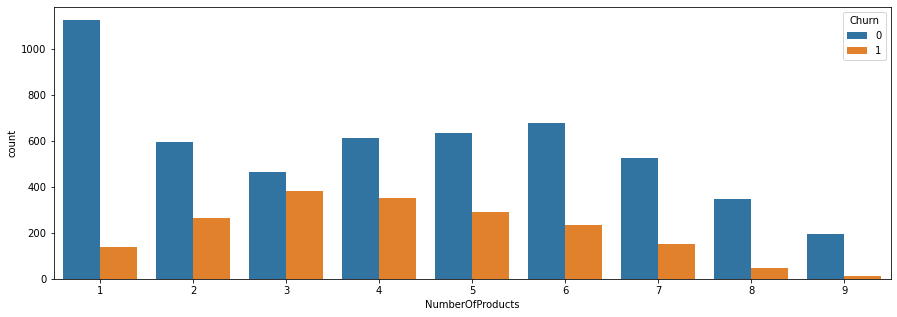

In [32]:
plot_barplot_by_target(df = df, input_name = 'NumberOfProducts', target_name = target_col)

### 4.2 Antigüedad en años

In [33]:
df['TenureYears'] = (df['tenure'] // 12)
df['TenureYears'].head()

0    0
1    2
2    0
3    3
4    0
Name: TenureYears, dtype: int64

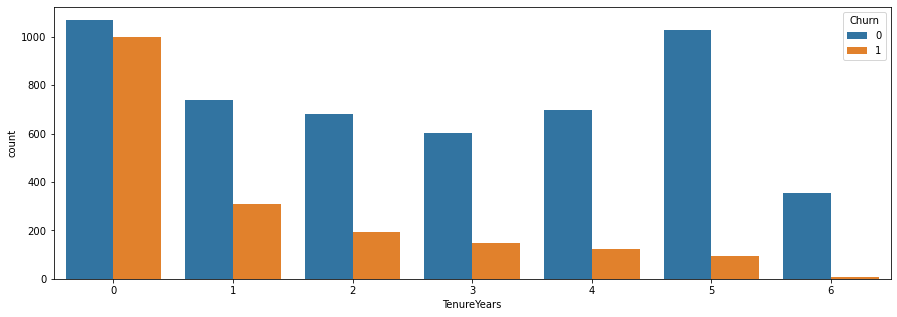

In [34]:
plot_barplot_by_target(df = df, input_name = 'TenureYears', target_name = target_col)

### 4.3 Diferencia porcentual entre el gasto mensual actual y mensual estimado histórico

In [35]:
df['MonthlyChargesDiff'] = df.apply(
    lambda r: (r['MonthlyCharges'] - (r['TotalCharges'] / max(r['tenure'], 1))) / r['MonthlyCharges'], 
    axis = 1
)
df['MonthlyChargesDiff'].head()

0    0.000000
1    0.024170
2   -0.004178
3    0.032966
4   -0.072489
Name: MonthlyChargesDiff, dtype: float64

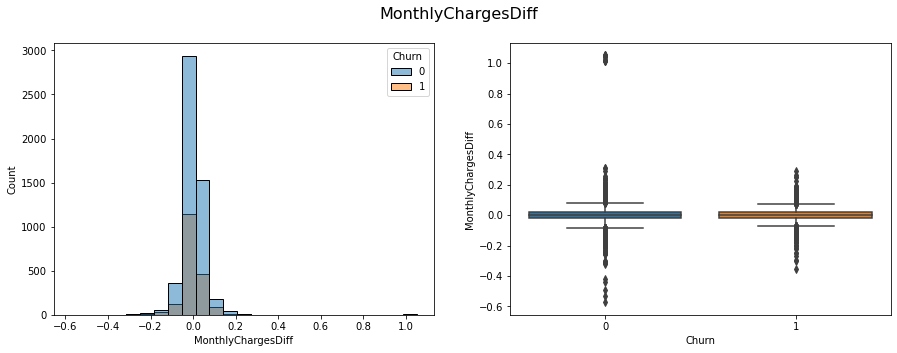

In [36]:
plot_histogram_by_target(df = df, input_name = 'MonthlyChargesDiff', target_name = target_col)

<a id='seccion5'></a>
## 5. Categorical encoding

In [37]:
# En este punto, vamos a seguir trabajando sobre una copia del dataframe df, 
# por si  quisieramos volver a este punto en algún momento
df_2 = df.copy()

In [38]:
# Podemos aplicar el OHE en pandas con la función get_dummies()
# Por defecto, directamente se aplica sobre todas las columnas categóricas, lo cual no nos interesa (ej: PassengerId)
# Podemos especificarle el nombre de las columnas sobre las cuales queremos aplicarlo con el argumento 'columns'

# Revisemos qué columnas categóricas tenemos ahora mismo:
categoric_cols_2 = df_2.select_dtypes(include = 'object').columns.tolist()
categoric_cols_2 = [c for c in categoric_cols_2 if c != 'customerID']

In [39]:
# Realizamos el OHE 
print("Número de variables antes del OHE:", df_2.shape[1])
df_2 = pd.get_dummies(df_2, columns = categoric_cols_2)
print("Número de variables después del OHE:", df_2.shape[1])
df_2.head()

Número de variables antes del OHE: 24
Número de variables después del OHE: 51


,customerID,tenure,MonthlyCharges,TotalCharges,Churn,NumberOfProducts,TenureYears,MonthlyChargesDiff,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,2,0,0.000000,1,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,4,2,0.024170,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,4,0,-0.004178,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,4,3,0.032966,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,2,0,-0.072489,1,0,...,0,1,0,0,0,1,0,0,1,0


In [40]:
# Comprobamos que la única variable categórica que queda es customerID
print(df_2.select_dtypes(include = 'object').columns.tolist())

['customerID']


<a id='seccion6'></a>
## 6. Entrenamiento del modelo

### 6.1 Partición en train / test

In [41]:
# Carga de la función 'train_test_split' del módulo model_selection de scikit-learn
from sklearn.model_selection import train_test_split

X = df_2.drop(columns = ['customerID', target_col]) # Matriz de inputs
y = df_2[target_col]

# Partición en train/test con un porcentaje de test del 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

# Número de registros del dataset de train y de test
print("Número de observaciones")
print("- Train: ", X_train.shape[0])
print("- Test:  ", X_test.shape[0])

Número de observaciones
- Train:  4718
- Test:   2325


### 6.2 Entrenamiento 

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 10) # Instanciación del modelo con máxima profundidad de 10
clf.get_params() # Hiperparámetros del modelo

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [43]:
# Entrenamiento del modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [44]:
# Obtención de predicciones sobre test
y_pred = clf.predict(X_test)
print("Predicciones:", y_pred[0:20])
print("Datos reales:", y_test[0:20].values)

Predicciones: [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
Datos reales: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0]


In [45]:
# Evaluación de la precisión del modelo
success = (y_pred == y_test)
print("Número de aciertos:", success.sum())
print("Total de predicciones:", len(success))
print("Ratio de acierto (Número de aciertos / Total de predicciones):", success.mean().round(2))

Número de aciertos: 1734
Total de predicciones: 2325
Ratio de acierto (Número de aciertos / Total de predicciones): 0.75


In [46]:
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred).round(2) # También lo podemos obtener con scikit-learn

0.75

### 6.3 Importancia de variables

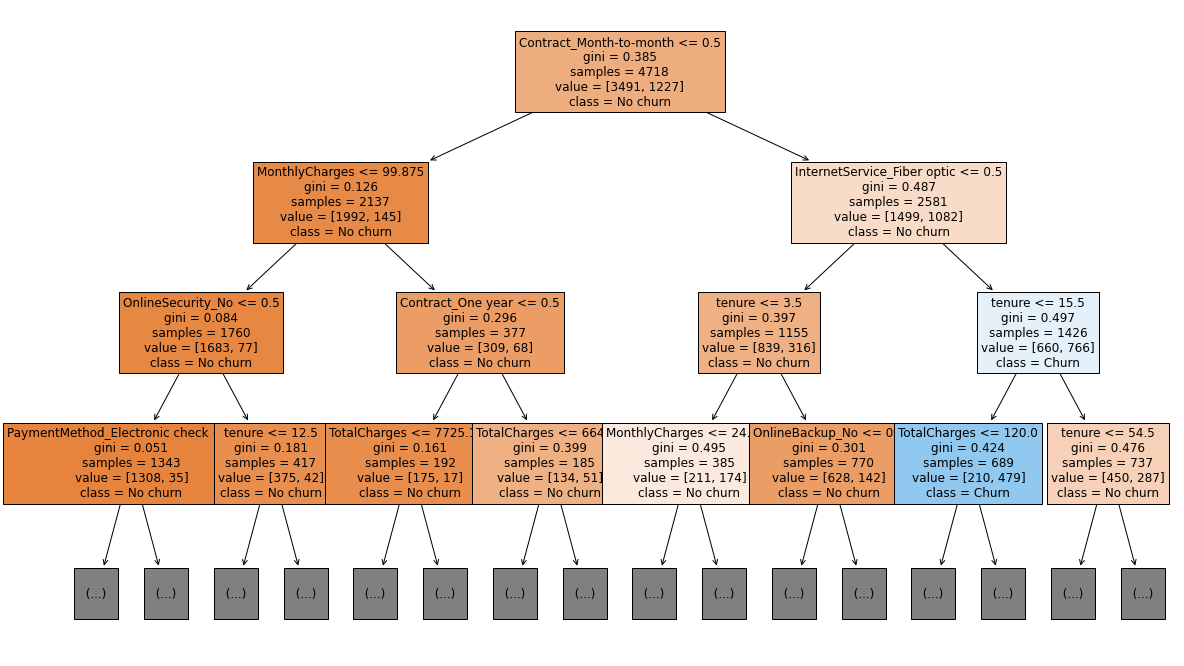

In [47]:
from sklearn.tree import plot_tree

# Visualización del árbol de decisión
fig = plt.figure(figsize=(20, 12))
plot_tree(
    clf, 
    max_depth = 3, 
    filled = True, 
    class_names = ["No churn", "Churn"],
    feature_names = X.columns,
    fontsize = 12
)
plt.show()

In [48]:
# Obtenemos la importancia de las variables
df_importances = pd.DataFrame(data = {
    'variable': X.columns, 
    'importance': clf.feature_importances_
})
df_importances.sort_values('importance', ascending = False, inplace = True)
df_importances.reset_index(drop = True, inplace = True)
df_importances.head()

,variable,importance
0,Contract_Month-to-month,0.258474
1,tenure,0.134334
2,TotalCharges,0.125507
3,MonthlyCharges,0.112052
4,MonthlyChargesDiff,0.109625


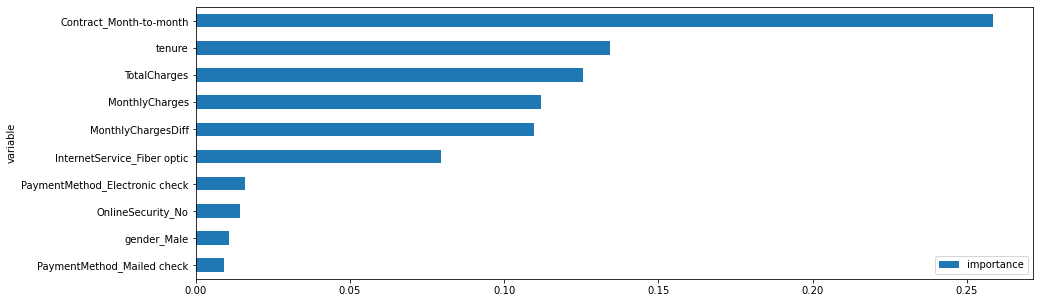

In [49]:
# Visualizamos la importancia de las n_features más importantes
n_features = 10
df_importances.iloc[:n_features][::-1].plot(x = 'variable', y = 'importance', kind = 'barh')
plt.show()

<a id='seccion7'></a>
## 7. Validación del modelo

### 7.1 Evaluación con distintas métricas

In [50]:
print("Accuracy en train:", metrics.accuracy_score(y_train, clf.predict(X_train)).round(2))
print("Accuracy en test:", metrics.accuracy_score(y_test, clf.predict(X_test)).round(2))

Accuracy en train: 0.89
Accuracy en test: 0.75


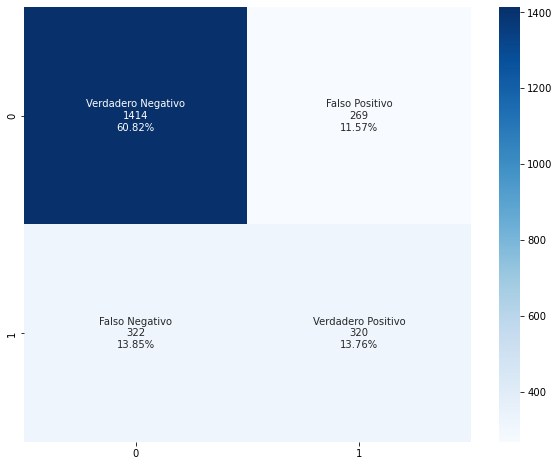

In [51]:
def make_confusion_matrix(cm):
    """Plots the confusion matrix

    Parameters:
    cm (2x2. numpy.ndarray): Confusion matrix

    Returns:
    None
    """
    group_names = ["Verdadero Negativo", "Falso Positivo", "Falso Negativo", "Verdadero Positivo"]
    group_counts = [value for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig = plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

cm = metrics.confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

### 7.2 Capacidad discriminativa general del modelo

In [52]:
# predict_proba devuelve las probabilidades de las dos clases, pero sólo nos interesa la clase 1 ([:,1])
y_proba = clf.predict_proba(X_test)[:,1]
print(y_proba[:10])

[1.         0.         0.         0.16666667 0.         0.
 0.15       0.5        0.         0.        ]


Veamos ahora gráficamente las probabilidades que asigna el modelo tanto para los supervivientes como para los no supervivientes.

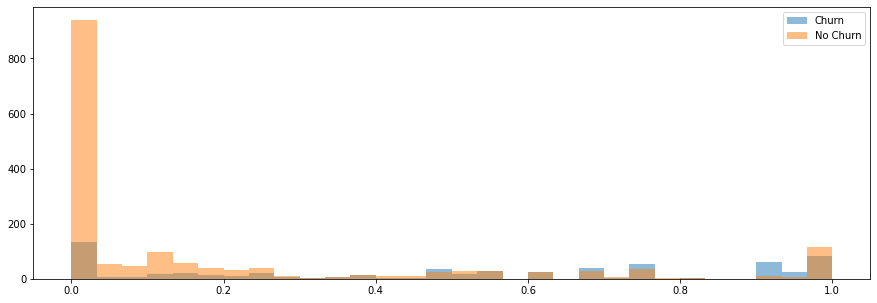

In [53]:
# y_proba[y_test == 1] me devuelve los valores de y_proba donde y_test vale 1, es decir, 
# me devuelve las probabilidades de los pasajeros supervivientes. De forma análoga, obtengo
# las probabilidades para los no supervivientes, especificando y_test == 0
plt.hist(y_proba[y_test == 1], bins = 30, alpha = 0.5, label = 'Churn')
plt.hist(y_proba[y_test == 0], bins = 30, alpha = 0.5, label = 'No Churn')
plt.legend()
plt.show()    

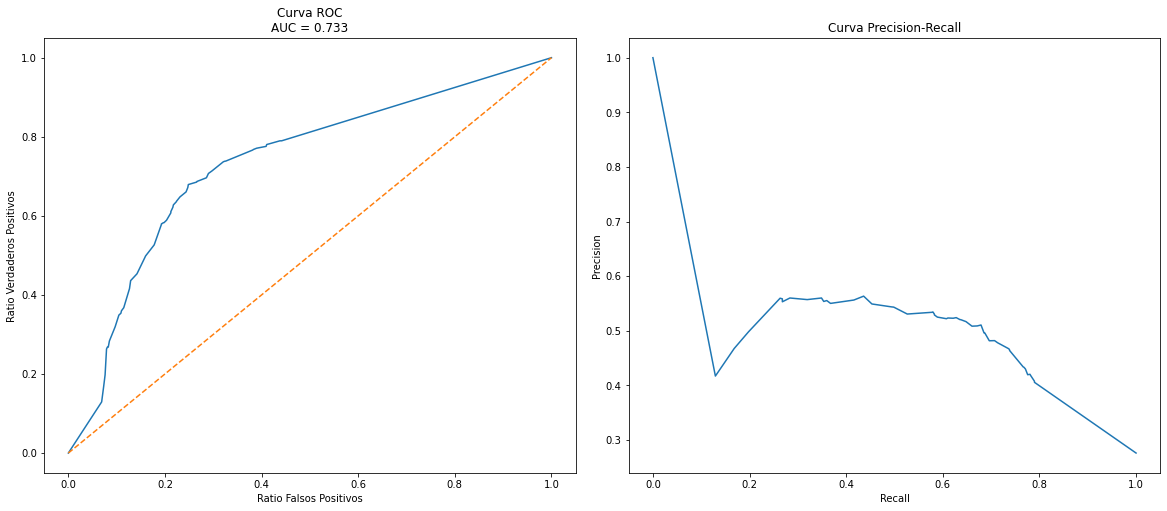

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.subplots_adjust(wspace = 0.1)

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba) # ROC Curve
roc_auc = metrics.auc(fpr, tpr) # ROC AUC
ax1.plot(fpr, tpr)

ax1.set_title(f"Curva ROC\nAUC = {round(roc_auc, 3)}")
ax1.set_xlabel("Ratio Falsos Positivos")
ax1.set_ylabel("Ratio Verdaderos Positivos")


ax2.set_title("Curva Precision-Recall")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")

precision, recall, _ = metrics.precision_recall_curve(y_test, y_proba) # Curva PR
ax2.plot(recall, precision)

ax1.plot(np.linspace(0,1,len(fpr)), np.linspace(0,1,len(fpr)), '--')
plt.show()